## PLINK Sample Code

###  Tasks

1. Filter SNP missing rate $<0.05$, MAF $> 0.1$, HWE $p>10^{-4}$ 
2. Run genome-wide association adjusted for Age and Sex in Caucasians
3. Run genome-wide association adjusted for Age, Sex, SNP*Sex interaction
4. QQ-plot
5. Summry top 20 associations

### [Plink](https://zzz.bwh.harvard.edu/plink/download.shtml) 

In [ ]:
#GWAS adjusted for Age and Sex in Caucasians
./plink --bfile GWAS2 --pheno GWAS2.phe --pheno-name BMI --covar GWAS2.phe 
--covar-name Age,sex --linear -hide-covar --adjust qq-plot --maf 0.1 --hwe 0.0001 --geno 0.05 
--hardy --missing --freq --out bmi_GWAS_Age_sex_filt

#### [Statement](https://www.cog-genomics.org/plink/1.9/data#irreg_output)    
**Read in dataset and set the model:**  
**--bfile** <profix> refer to all binary files, GWAS2.bed + GWAS2.bim +GWAS2.fam  
**--pheno** load phenotype file  
**--pheno-name <column name>**  Select a column by title   
**--covar <filename>** Designates the file to load covariates from  
**--covar-name** Specify a subset of covariates to load, by column name  
**--linear** Perform inear regression  
    
**Quality Check:**     
**--maf 0.1** Filters out all variants with minor allele frequency below 0.1  
**-hwe 0.0001** Filters out all variants which have Hardy-Weinberg equilibrium exact test p-value below 0.0001  
**--geno 0.05** Filters out all variants with missing call rates exceeding the provided value 0.05  
    
**Output:**    
**--hardy** Writes a list of genotype counts and Hardy-Weinberg equilibrium exact test statistic  
**--missing** Produces sample-based and variant-based missing data reports  
**--freq** Writes a minor allele frequency report        
**--out** Output the dataset  

In [ ]:
# GWAS adjusted for Age, Sex and SNP*Sex interaction in Caucasians
./plink --bfile GWAS2 --pheno GWAS2.phe --pheno-name BMI --covar GWAS2.phe 
--covar-name Age, sex --interaction --parameters 1,2,3,4 --linear -hide-covar --adjust qq-plot 
--maf 0.1 --hwe 0.0001 --geno 0.05 --hardy --missing --freq --out bmi_GWAS_Age_sex_snpsex_filt

#### Addition Statement
**--interaction** Adds genotype x covariate interactions to the model  
**--parameters** Gives a list of 1-based indices and removes the unlisted covriates (exp: remove sex x genotype in the code above)  
**-hide-covar** Removes covariate-specific lines from the main report  
**--adjust** Causes an .adjusted file to be generated with each association test report, containing several basic multiple testing corrections for the raw p-values  

### Result Interpretation

In [4]:
#Read in relevant dataset
Analysis1_pvalue<-
read.delim("/Users/xiangyijin/Downloads/plink_mac_20190617/bmi_GWAS_Age_sex_filt.assoc.linear.adjusted",sep = "")
Analysis1_maf<-
read.delim("/Users/xiangyijin/Downloads/plink_mac_20190617/bmi_GWAS_Age_sex_filt.frq",sep = "")
Analysis1_hwe<-
read.delim("/Users/xiangyijin/Downloads/plink_mac_20190617/bmi_GWAS_Age_sex_filt.hwe",sep = "")
Analysis1_miss<-
read.delim("/Users/xiangyijin/Downloads/plink_mac_20190617/bmi_GWAS_Age_sex_filt.lmiss",sep = "")

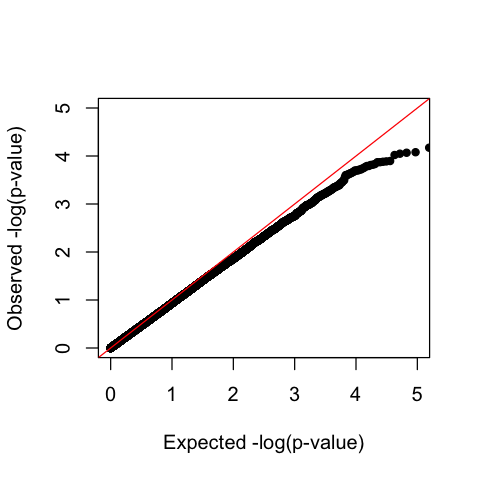

In [5]:
# Plot the mean attendance rate per visit
options(repr.plot.width=4, repr.plot.height=4)
pval.expected<-na.omit(Analysis1_pvalue$QQ)
pval<-na.omit(Analysis1_pvalue$UNADJ)
plot(-log10(sort(pval.expected)),-log10(sort(pval)),xlim=c(0,5),ylim=c(0,5),cex=0.8, 
xlab="Expected -log(p-value)", ylab="Observed -log(p-value)",pch=19)
abline(a=c(0,0),b=1, col="red")

In [13]:
outcome1<-Analysis1_pvalue[1:20,c(1,2,3)]
outcome1_1<-merge(outcome1,Analysis1_maf[,c(2,5)],by="SNP")
outcome1_2<-merge(outcome1_1,Analysis1_hwe[,c(2,9)],by="SNP")
outcome1_3<-merge(outcome1_2,Analysis1_miss[,c(2,5)],by="SNP")
names(outcome1_3)<-c("SNP","Chromosome","Unadjusted p-value","Minor Allel Frequency","HWE p-value",
                     "SNP Missing Rate")
outcome1_3<-outcome1_3[order(outcome1_3$`Unadjusted p-value`),]
#Code to generate the plot below in R markdown
#kable(outcome2_3,"latex", booktabs = T, caption ="SNPs with top 20 p-value in GWAS (Adjusted for Age,Sex and Sex/SNP Interaction)") %>%
#kable_styling(latex_options = c("striped","scale_down", "hold_position"))#

![](https://raw.githubusercontent.com/yijinxiang777/Images/master/WX20200531-173909.png)